In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import root_mean_squared_error as rmse,  accuracy_score, mean_squared_error as mse

# Kunskapskontroll

### Fyll i uppgifterna nedan innan du lämnar in på LearnPoint: 
Namn på samtliga gruppmedlemmar: 

# Project Steps

* Import & Analyze the Data
* Analyze features & measue feature importance
* Clean up data missing values
* Transform Data
* Build pipeline (-> Transform data, Scale Data )
* GridSearch parametergrid for models
* Validate model
* Test model

# Code

#### Loading Data

In [2]:
original_data = pd.read_csv(r'.\kunskapskontroll_ai2_del1\housing.csv')

#### EDA of Original Data

In [3]:
original_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
original_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


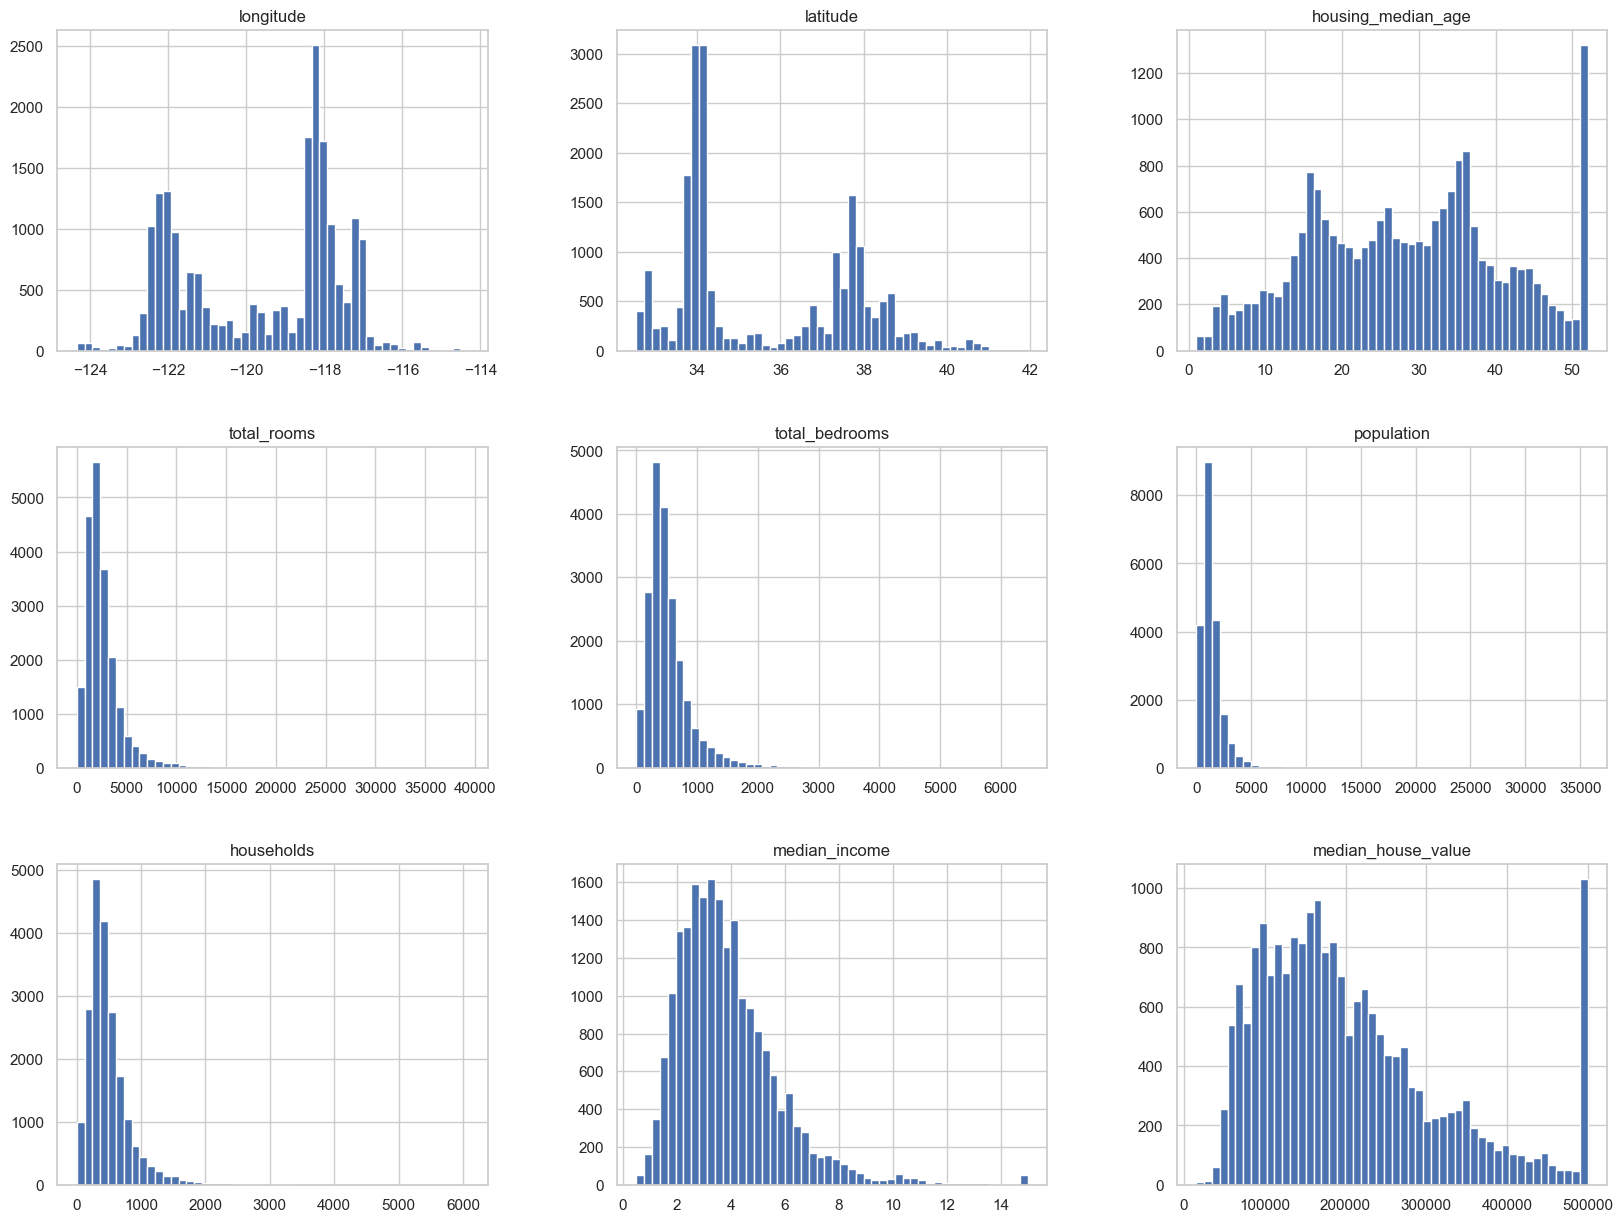

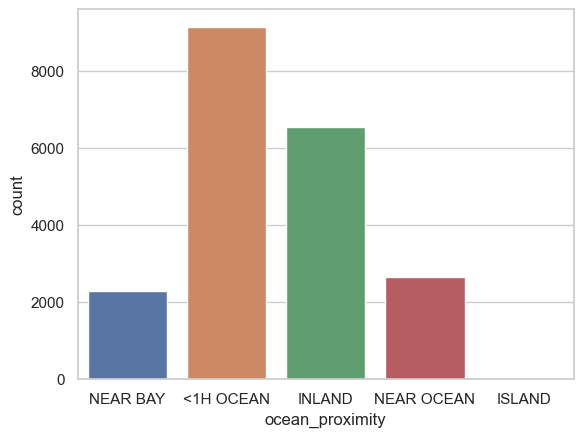

In [5]:
sns.set(style="whitegrid")

# Histograms of Original Data (count)
original_data.hist(bins=50, figsize=(20, 15))
plt.show()

# Bar plot for Ocean Proximity
sns.countplot(x='ocean_proximity', data=original_data)
plt.show()

In [6]:
# drop island
print("Original Data: Ocean Proximity Count")
print(original_data.ocean_proximity.value_counts())
print("Total: ",original_data.ocean_proximity.count())

Original Data: Ocean Proximity Count
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
Total:  20640


#### Feature Engineering & Feature Selection

In [7]:
# Save the original data for later use if necessary.
data = original_data

# Transforming the columns 'column_xi' ('total_rooms', 'total_bedrooms', 'population' and 'households') with 
# log(xi + 1) to get a better spread of the data.

# For the data columns that need a better spread use log(xi + 1). The +1 is to avoid log(0) (undefined), where xi >= 0. The values are
# concentrated around one or a few x-values.
data['total_rooms'] = np.log(data['total_rooms'] +1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] +1)
data['population'] = np.log(data['population'] +1)
data['households'] = np.log(data['households'] +1)

# Creating new feature columns in the Dataset
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['bedrooms_per_room_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Transforming 'ocean_proximity' feature using dummy variable encoding
data = pd.get_dummies(data, columns=['ocean_proximity'], dtype=int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   rooms_per_household         20640 non-null  float64
 10  bedrooms_per_household      20433 non-null  float64
 11  bedrooms_per_room_ratio     20433 non-null  float64
 12  population_per_household    20640 non-null  float64
 13  ocean_proximity_<1H OCEAN   206

In [8]:
# List of features used for the training data:
housing_features = [
    'median_house_value',
    'longitude',
    'latitude',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'bedrooms_per_room_ratio',
    'population_per_household',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
]
housing = data[housing_features]

## EDA on Transformed Data

#### Inspecting Transformed Data

#### Checking Missing Values

In [9]:
housing.info()

print('-'*50)

# Checking for missing Values
housing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   median_house_value          20640 non-null  float64
 1   longitude                   20640 non-null  float64
 2   latitude                    20640 non-null  float64
 3   housing_median_age          20640 non-null  float64
 4   median_income               20640 non-null  float64
 5   rooms_per_household         20640 non-null  float64
 6   bedrooms_per_household      20433 non-null  float64
 7   bedrooms_per_room_ratio     20433 non-null  float64
 8   population_per_household    20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  int32  
 10  ocean_proximity_INLAND      20640 non-null  int32  
 11  ocean_proximity_ISLAND      20640 non-null  int32  
 12  ocean_proximity_NEAR BAY    20640 non-null  int32  
 13  ocean_proximity_NEAR OCEAN  206

median_house_value              0
longitude                       0
latitude                        0
housing_median_age              0
median_income                   0
rooms_per_household             0
bedrooms_per_household        207
bedrooms_per_room_ratio       207
population_per_household        0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [10]:
# Drop all null values
## Use Imputer instead
housing.fillna(housing.median(), inplace=True)

housing.info()
print('-'*50)
print('Null values:')
print(housing.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   median_house_value          20640 non-null  float64
 1   longitude                   20640 non-null  float64
 2   latitude                    20640 non-null  float64
 3   housing_median_age          20640 non-null  float64
 4   median_income               20640 non-null  float64
 5   rooms_per_household         20640 non-null  float64
 6   bedrooms_per_household      20640 non-null  float64
 7   bedrooms_per_room_ratio     20640 non-null  float64
 8   population_per_household    20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  int32  
 10  ocean_proximity_INLAND      20640 non-null  int32  
 11  ocean_proximity_ISLAND      20640 non-null  int32  
 12  ocean_proximity_NEAR BAY    20640 non-null  int32  
 13  ocean_proximity_NEAR OCEAN  206

C:\Users\Joakim\AppData\Local\Temp\ipykernel_17520\2105182758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.fillna(housing.median(), inplace=True)


### Correlation Matrix

In [11]:
# Visualising Housing dataset Correlation
correlation_matrix = housing.corr()
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
sns.set(style="whitegrid")

target_correlations

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
rooms_per_household           0.113995
housing_median_age            0.105623
ocean_proximity_ISLAND        0.023416
longitude                    -0.045967
bedrooms_per_household       -0.074018
latitude                     -0.144160
population_per_household     -0.179463
bedrooms_per_room_ratio      -0.197761
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

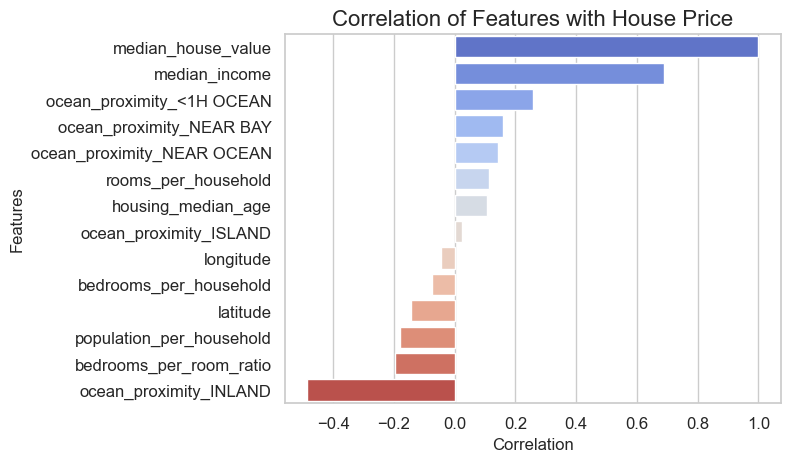

In [12]:
# Correlation Barplot
bar_plot = sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")
plt.title("Correlation of Features with House Price")
bar_plot.set_title("Correlation of Features with House Price", fontsize=16)
bar_plot.set_xlabel("Correlation")
bar_plot.set_ylabel("Features")
bar_plot.tick_params(labelsize=12)
plt.show()

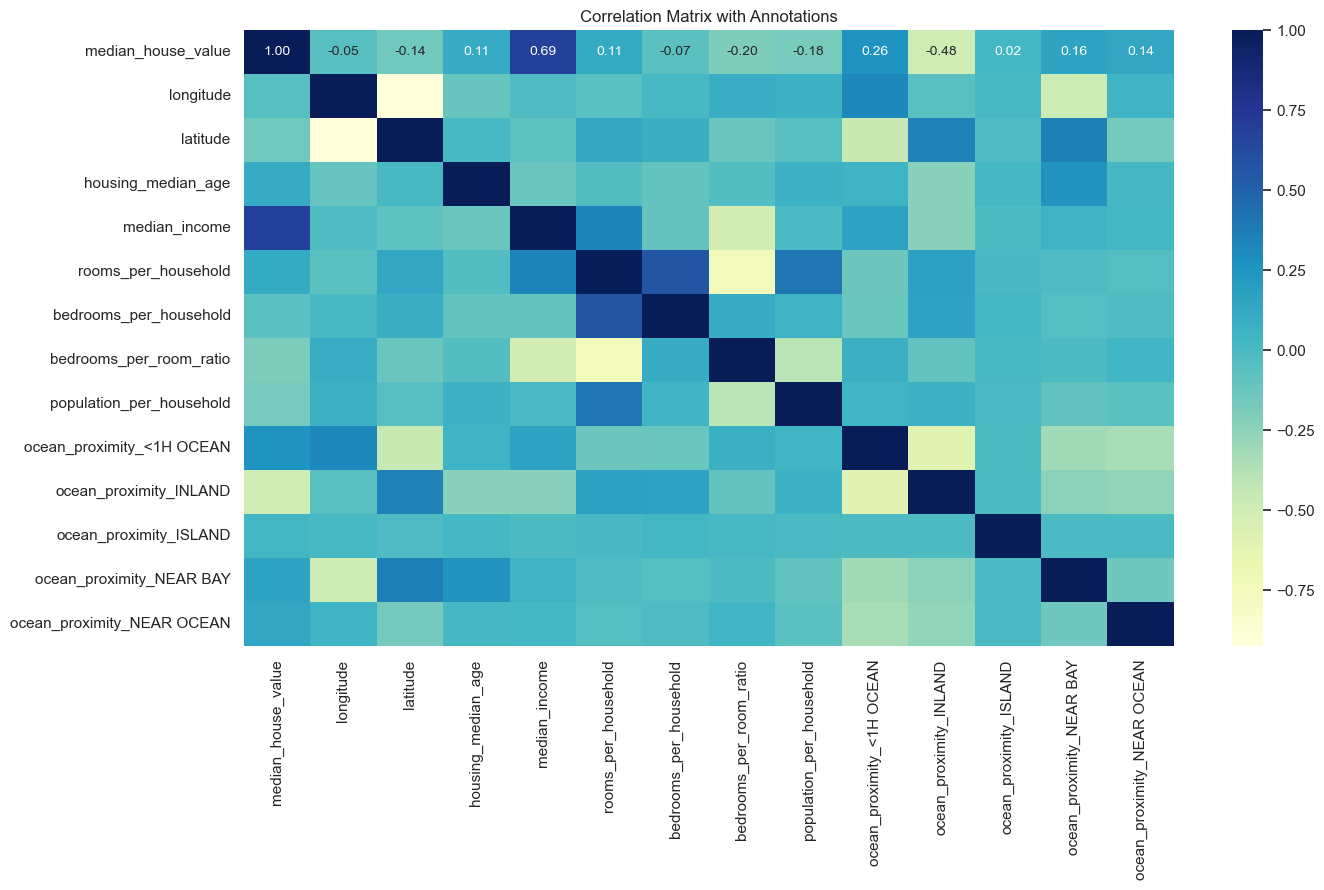

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Matrix with Annotations')
plt.show()

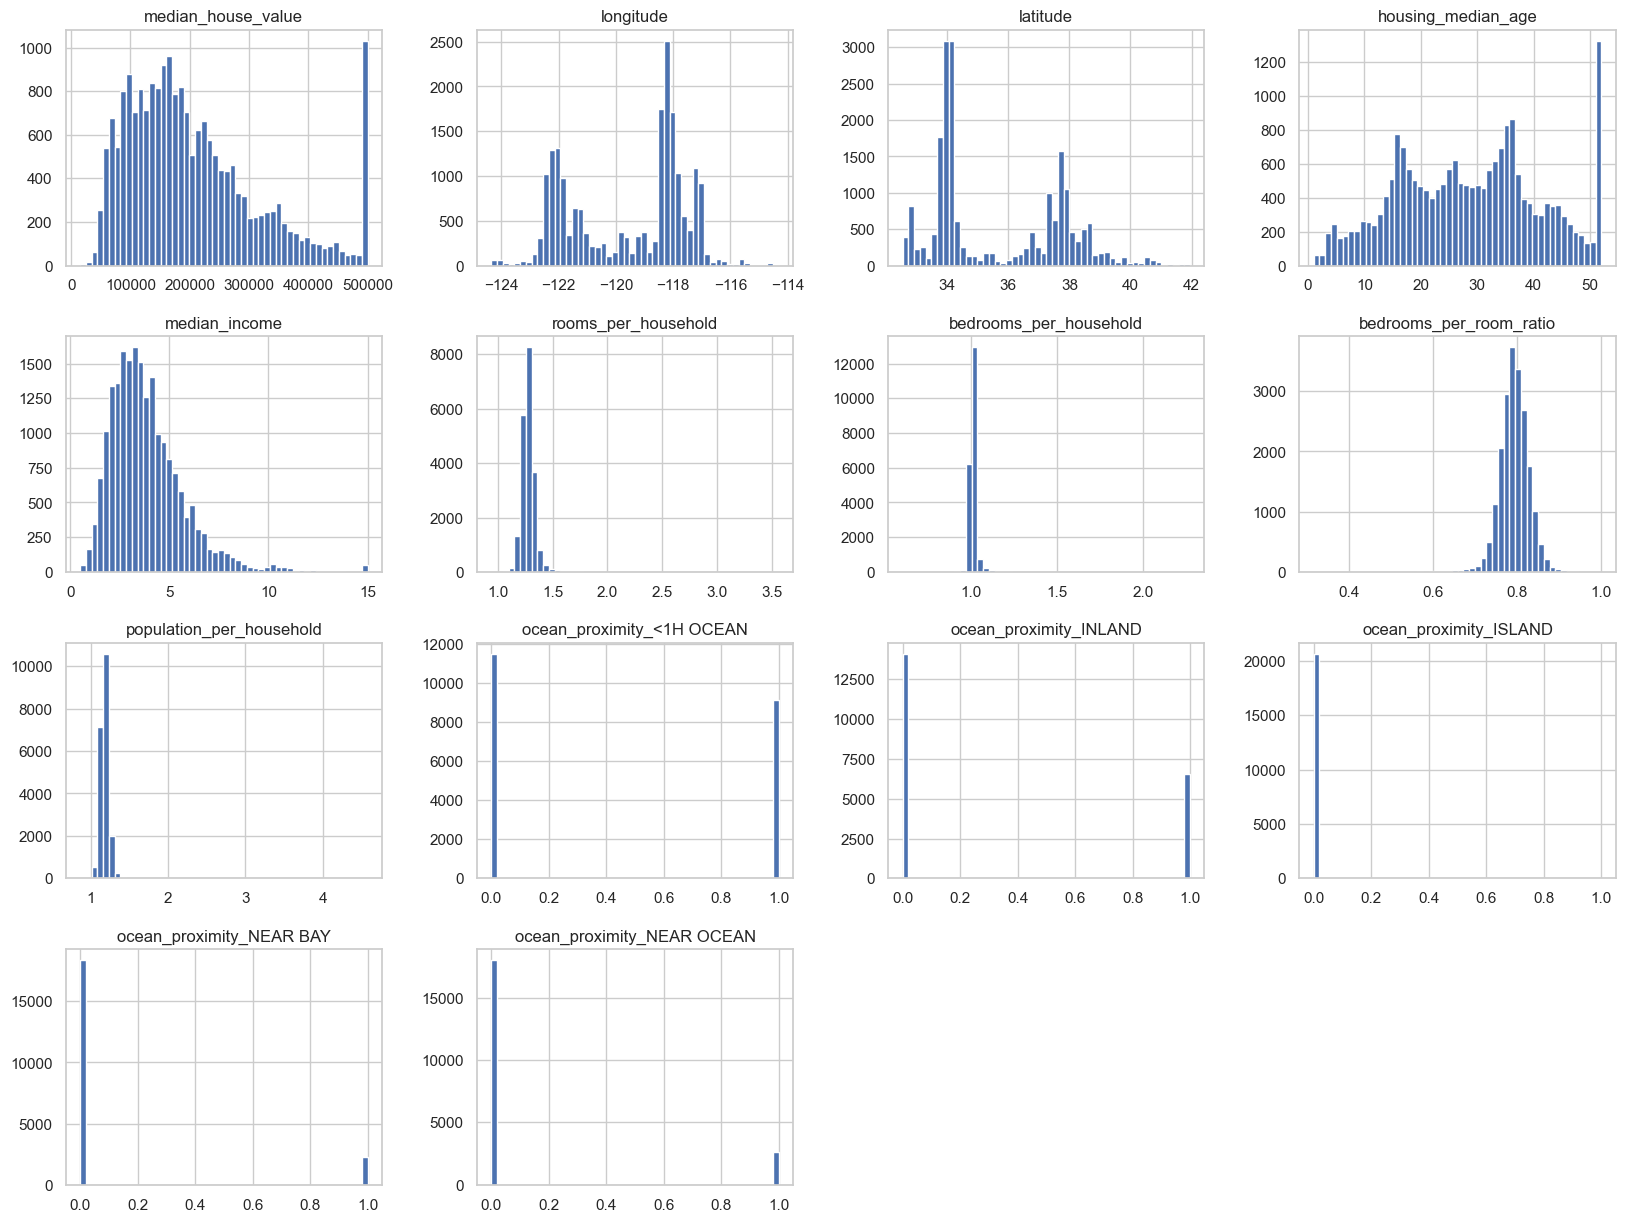

In [14]:
# Histograms
housing.hist(bins=50, figsize=(20, 15))
plt.show()

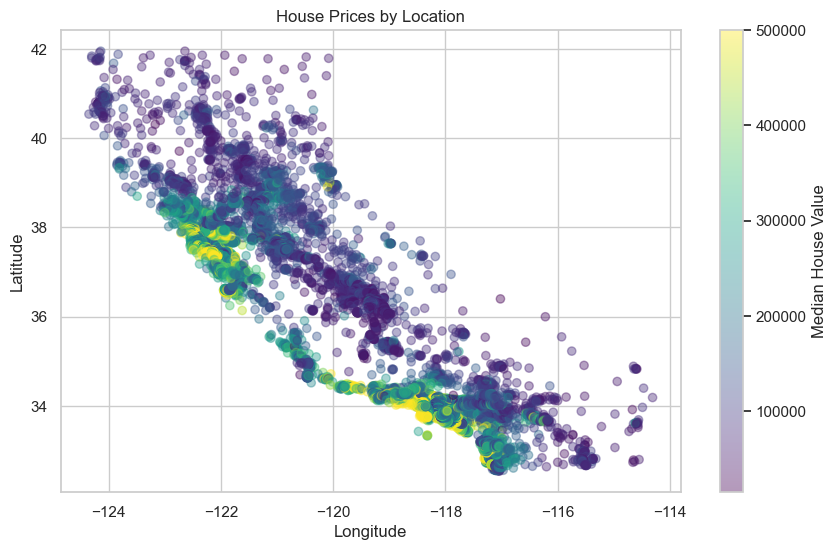

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.4, c=housing['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

# Map of California

### Inspecting house median age & house median value capped values

In [16]:
housing.max()

median_house_value            500001.000000
longitude                       -114.310000
latitude                          41.950000
housing_median_age                52.000000
median_income                     15.000100
rooms_per_household                3.560877
bedrooms_per_household             2.271895
bedrooms_per_room_ratio            1.000000
population_per_household           4.582660
ocean_proximity_<1H OCEAN          1.000000
ocean_proximity_INLAND             1.000000
ocean_proximity_ISLAND             1.000000
ocean_proximity_NEAR BAY           1.000000
ocean_proximity_NEAR OCEAN         1.000000
dtype: float64

In [17]:
housing[['housing_median_age', 'median_house_value', 'median_income', 'population_per_household', 'rooms_per_household', 'bedrooms_per_household']].max()

housing_median_age              52.000000
median_house_value          500001.000000
median_income                   15.000100
population_per_household         4.582660
rooms_per_household              3.560877
bedrooms_per_household           2.271895
dtype: float64

In [18]:
capped_value = 500001
max_age = 52
max_income = 15.0001
max_population = 1243.333333
max_rooms = 132.533333
max_bedrooms = 34.066667

capped_house_value = housing[housing['median_house_value'] == capped_value]
capped_house_age = housing[housing['housing_median_age'] == max_age]
capped_income = housing[housing['median_income'] == max_income]

capped_population = housing[housing['population_per_household'] == max_population]
capped_rooms = housing[housing['rooms_per_household'] == max_population]
capped_bedrooms = housing[housing['bedrooms_per_household'] == max_population]


In [19]:
print("Capped House Value Cases:\n\n", capped_house_value.count())

Capped House Value Cases:

 median_house_value            965
longitude                     965
latitude                      965
housing_median_age            965
median_income                 965
rooms_per_household           965
bedrooms_per_household        965
bedrooms_per_room_ratio       965
population_per_household      965
ocean_proximity_<1H OCEAN     965
ocean_proximity_INLAND        965
ocean_proximity_ISLAND        965
ocean_proximity_NEAR BAY      965
ocean_proximity_NEAR OCEAN    965
dtype: int64


In [20]:
print("Capped House Age Cases:\n\n", capped_house_age.count())

Capped House Age Cases:

 median_house_value            1273
longitude                     1273
latitude                      1273
housing_median_age            1273
median_income                 1273
rooms_per_household           1273
bedrooms_per_household        1273
bedrooms_per_room_ratio       1273
population_per_household      1273
ocean_proximity_<1H OCEAN     1273
ocean_proximity_INLAND        1273
ocean_proximity_ISLAND        1273
ocean_proximity_NEAR BAY      1273
ocean_proximity_NEAR OCEAN    1273
dtype: int64


In [21]:
print("Capped Income Cases:\n\n", capped_income.count())

Capped Income Cases:

 median_house_value            49
longitude                     49
latitude                      49
housing_median_age            49
median_income                 49
rooms_per_household           49
bedrooms_per_household        49
bedrooms_per_room_ratio       49
population_per_household      49
ocean_proximity_<1H OCEAN     49
ocean_proximity_INLAND        49
ocean_proximity_ISLAND        49
ocean_proximity_NEAR BAY      49
ocean_proximity_NEAR OCEAN    49
dtype: int64


## Data Cleanup

In [22]:
housing = housing[housing['median_house_value'] < capped_value]
housing = housing[housing['housing_median_age'] < max_age]
housing = housing[housing['median_income'] < max_income]
housing = housing[housing['population_per_household'] < max_population]
housing = housing[housing['rooms_per_household'] < max_population]
housing = housing[housing['bedrooms_per_household'] < max_population]


housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18570 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   median_house_value          18570 non-null  float64
 1   longitude                   18570 non-null  float64
 2   latitude                    18570 non-null  float64
 3   housing_median_age          18570 non-null  float64
 4   median_income               18570 non-null  float64
 5   rooms_per_household         18570 non-null  float64
 6   bedrooms_per_household      18570 non-null  float64
 7   bedrooms_per_room_ratio     18570 non-null  float64
 8   population_per_household    18570 non-null  float64
 9   ocean_proximity_<1H OCEAN   18570 non-null  int32  
 10  ocean_proximity_INLAND      18570 non-null  int32  
 11  ocean_proximity_ISLAND      18570 non-null  int32  
 12  ocean_proximity_NEAR BAY    18570 non-null  int32  
 13  ocean_proximity_NEAR OCEAN  18570 no

In [44]:
# List of features used for the training data:
training_data_features = [
    'median_house_value',
    'latitude',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_room_ratio',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
]
training_data = housing[training_data_features]

# List of features used for the training data (set 2):
training_data_features2 = [
    'median_house_value',
    'longitude',
    'latitude',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'bedrooms_per_room_ratio',
    # 'population_per_household',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
]
training_data2 = housing[training_data_features2]

# Datacolumns that need a better spread use log(xi + 1). The +1 is to avoid log(0) (undefined). The values are
# concentrated around one or a few x-values.

# training_data2.loc[:, 'rooms_per_household'] = np.log(training_data2['rooms_per_household'] + 1)
# training_data2.loc[:, 'bedrooms_per_household'] = np.log(training_data2['bedrooms_per_household'] + 1)
# training_data2.loc[:, 'bedrooms_per_room_ratio'] = np.log(training_data2['bedrooms_per_room_ratio'] + 1)


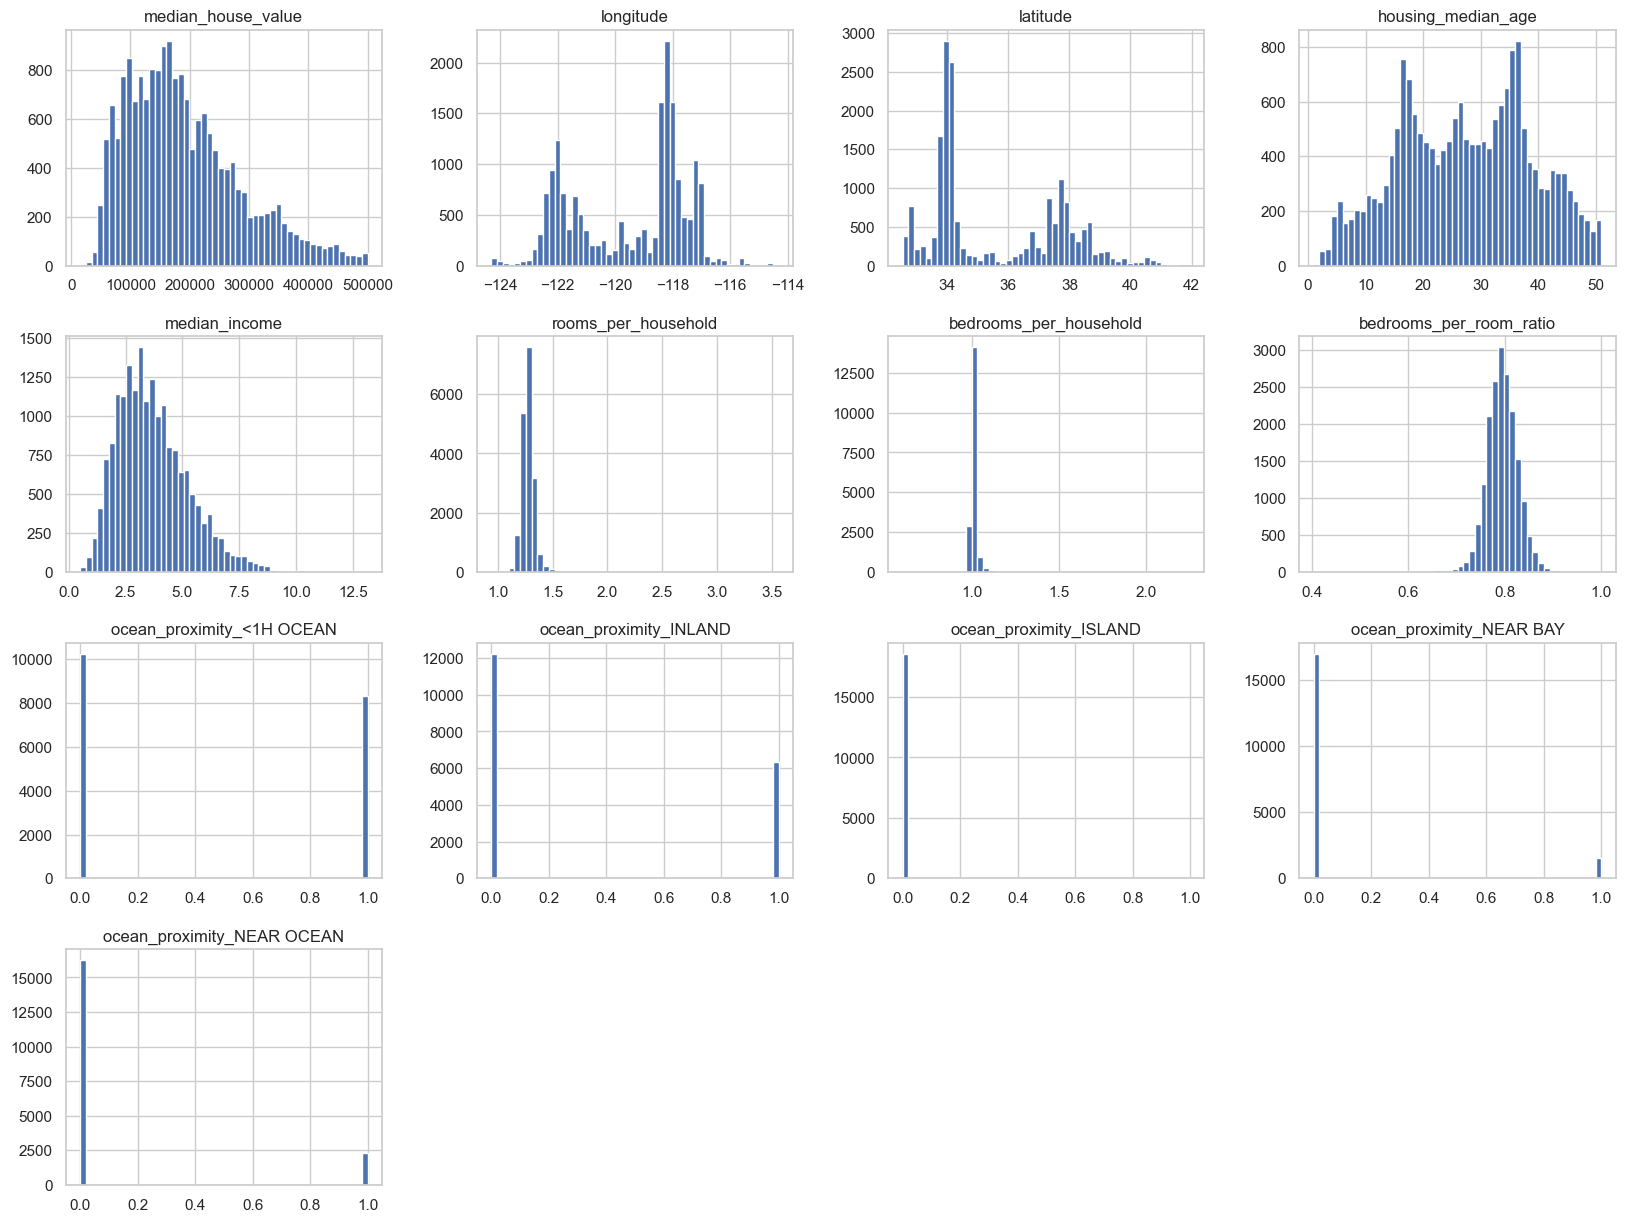

In [24]:
training_data2.hist(bins=50, figsize=(20, 15))
plt.show()

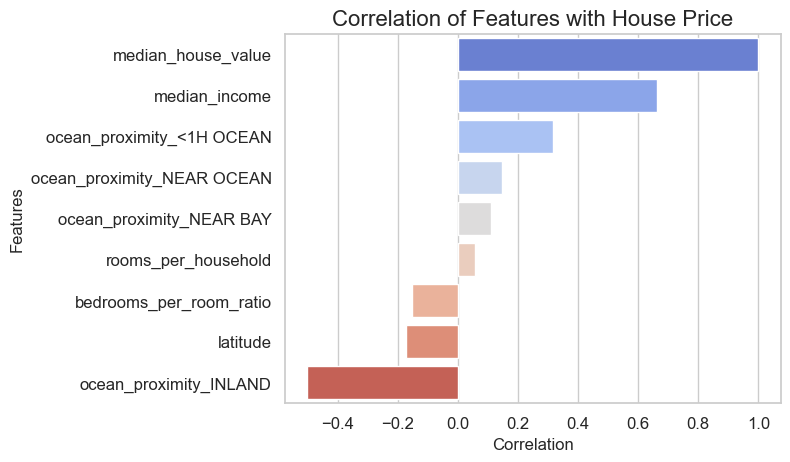

In [25]:
correlation_matrix = training_data.corr()
target_correlations = correlation_matrix['median_house_value'].sort_values(ascending=False)
sns.set(style="whitegrid")

# Correlation Barplot
bar_plot = sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")
plt.title("Correlation of Features with House Price")
bar_plot.set_title("Correlation of Features with House Price", fontsize=16)
bar_plot.set_xlabel("Correlation")
bar_plot.set_ylabel("Features")
bar_plot.tick_params(labelsize=12)
plt.show()

## Model

In [45]:
# Defining Median House Value as target variable.
X = training_data2.drop('median_house_value', axis=1)
y = training_data2['median_house_value']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

In [46]:
# Number of columns (n2) scaled with StandardScaler.
n2 = 8

scaler = StandardScaler().fit(X_train.iloc[:, :n2])

def preprocessor(X):
    A = np.copy(X)
    A[:, :n2] = scaler.transform(A[:, :n2])
    return A

In [47]:
X_train_sc = preprocessor(X_train)
X_val_sc = preprocessor(X_val)
X_test_sc = preprocessor(X_test)
X_train_val_sc = preprocessor(X_train_val)

D:\Program\Programming\Anaconda3\envs\AI1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Program\Programming\Anaconda3\envs\AI1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Program\Programming\Anaconda3\envs\AI1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Program\Programming\Anaconda3\envs\AI1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
# Linear regression.

lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, y_train)
y_pred_val = lin_reg.predict(X_val_sc)
y_pred_train = lin_reg.predict(X_train_sc)
y_pred_test = lin_reg.predict(X_test_sc)

In [49]:
rmse_val = rmse(y_val, y_pred_val)
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print('rmse_train', rmse_train)
print('rmse_val', rmse_val)
print('rmse_test', rmse_test)

rmse_train 60208.37165221081
rmse_val 58129.6568699846
rmse_test 62480.085388632986


In [31]:
lin_reg.score(X_val_sc, y_val)

0.6283760219200942

In [32]:
# Random Forest regression.

rfg_reg_start = RandomForestRegressor()

hyper_param_grid = { 
    'n_estimators': [100, 150],
    'max_depth' : [8, 10, 20],
}

rfg_reg = GridSearchCV(rfg_reg_start, param_grid = hyper_param_grid, cv = 3)



In [33]:
rfg_reg.fit(X_train_sc, y_train)

print('RandomForestRegressor:', rfg_reg.best_params_)

# scores_forest = cross_validate(rfg_reg, X_train_sc, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
# print('RMSE for each iteration:', np.sqrt(-scores_forest))
# print('RMSE:', np.sqrt(np.mean(-scores_forest)))

y_pred_val = rfg_reg.predict(X_val_sc)
y_pred_train = rfg_reg.predict(X_train_sc)
y_pred_test = rfg_reg.predict(X_test_sc)

rmse_val = rmse(y_val, y_pred_val)
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print(f'rmse_train:', rmse_train)
print(f'rmse_val:', rmse_val)
print(f'rmse_test:', rmse_test)

print("Score:", rfg_reg.score(X_val_sc, y_val))

RandomForestRegressor: {'max_depth': 20, 'n_estimators': 150}
RMSE for each iteration: [47536.59096224 48967.32601811 49432.90340549]
RMSE: 48652.29846153586
rmse_train: 17587.916579985696
rmse_val: 44640.47292968144
rmse_test: 46568.5143133305
Score: 0.7808377335162465


In [34]:
# KNeighbors regression.

kng_reg_start = KNeighborsRegressor()

hyper_param_grid = { 
    'n_neighbors': [10, 12, 15, 18, 19, 20],
}

kng_reg = GridSearchCV(kng_reg_start, param_grid = hyper_param_grid, cv = 3)


In [35]:
kng_reg.fit(X_train_sc, y_train)

print('KNeighborsRegressor:', kng_reg.best_params_)

# scores_neighbors = cross_validate(kng_reg, X_train_sc, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
# print('RMSE for each iteration:', np.sqrt(-scores_neighbors))
# print('RMSE:', np.sqrt(np.mean(-scores_neighbors)))

y_pred_val = kng_reg.predict(X_val_sc)
y_pred_train = kng_reg.predict(X_train_sc)
y_pred_test = kng_reg.predict(X_test_sc)

rmse_val = rmse(y_val, y_pred_val)
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print(f'rmse_train:', rmse_train)
print(f'rmse_val:', rmse_val)
print(f'rmse_test:', rmse_test)

print("Score:", kng_reg.score(X_val_sc, y_val))

KNeighborsRegressor: {'n_neighbors': 19}
RMSE for each iteration: [57065.18992264 57343.91363601 58333.51768318]
RMSE: 57583.44558781649
rmse_train: 53625.776955725145
rmse_val: 54816.36003046095
rmse_test: 57413.574453230234
Score: 0.6695326205335366


In [36]:
# Gradient Boosting regression.

gbr_reg_start = GradientBoostingRegressor()

hyper_param_grid = { 
    'n_estimators': [100, 150, 200, 250],
}

gbr_reg = GridSearchCV(gbr_reg_start, param_grid = hyper_param_grid, cv = 3)


In [37]:
gbr_reg.fit(X_train_sc, y_train)

print('GradientBoostingRegressor:', gbr_reg.best_params_)

# scores_boosters = cross_validate(gbr_reg, X_train_sc, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
# print('RMSE for each iteration:', np.sqrt(-scores_boosters))
# print('RMSE:', np.sqrt(np.mean(-scores_boosters)))

y_pred_val = gbr_reg.predict(X_val_sc)
y_pred_train = gbr_reg.predict(X_train_sc)
y_pred_test = gbr_reg.predict(X_test_sc)

rmse_val = rmse(y_val, y_pred_val)
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print(f'rmse_train:', rmse_train)
print(f'rmse_val:', rmse_val)
print(f'rmse_test:', rmse_test)

print("Score:", gbr_reg.score(X_val_sc, y_val))

GradientBoostingRegressor: {'n_estimators': 250}
RMSE for each iteration: [46349.00627793 48523.12681735 48918.1450339 ]
RMSE: 47943.40111924626
rmse_train: 42589.95829983811
rmse_val: 45790.0428991528
rmse_test: 48338.16613178126
Score: 0.7694047750080253


In [7]:
####

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Funktion för att beräkna RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Ladda data
original_data = pd.read_csv(r'.\kunskapskontroll_ai2_del1\housing.csv')

# EDA av originaldata
original_data.describe()

# Droppa 'ISLAND'
data = original_data[original_data.ocean_proximity != 'ISLAND']

# Transformera kolumner med log(xi + 1)
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    data[col] = np.log(data[col] + 1)

# Skapa nya funktioner
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_household'] = data['total_bedrooms'] / data['households']
data['bedrooms_per_room_ratio'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Transformera 'ocean_proximity' med dummy variabel kodning
data = pd.get_dummies(data, columns=['ocean_proximity'], dtype=int)

# Lista av funktioner för träningsdata
housing_features = [
    'median_house_value',
    'longitude',
    'latitude',
    'housing_median_age',
    'median_income',
    'rooms_per_household',
    'bedrooms_per_household',
    'bedrooms_per_room_ratio',
    'population_per_household',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN',
]
housing = data[housing_features]

# Fyll på saknade värden
housing.fillna(housing.median(), inplace=True)

# Split data
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)


C:\Users\Ägaren\AppData\Local\Temp\ipykernel_7172\1524670395.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.log(data[col] + 1)
C:\Users\Ägaren\AppData\Local\Temp\ipykernel_7172\1524670395.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rooms_per_household'] = data['total_rooms'] / data['households']
C:\Users\Ägaren\AppData\Local\Temp\ipykernel_7172\1524670395.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [3]:
# Bygg pipeline
num_features = [
    'longitude', 'latitude', 'housing_median_age', 'median_income', 
    'rooms_per_household', 'bedrooms_per_household', 'bedrooms_per_room_ratio', 'population_per_household'
]
cat_features = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])


In [4]:
# GridSearchCV
param_grid = { 
    'model__n_estimators': [100, 150, 200, 250],
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

print('GradientBoostingRegressor best params:', grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
GradientBoostingRegressor best params: {'model__n_estimators': 250}


In [5]:
# Validera modell
best_model = grid_search.best_estimator_

y_pred_val = best_model.predict(X_val)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

rmse_val = rmse(y_val, y_pred_val)
rmse_train = rmse(y_train, y_pred_train)
rmse_test = rmse(y_test, y_pred_test)

print(f'rmse_train:', rmse_train)
print(f'rmse_val:', rmse_val)
print(f'rmse_test:', rmse_test)


rmse_train: 45682.153081150354
rmse_val: 45578.90620500594
rmse_test: 50373.570620965256


In [8]:
# Testa modell
test_score = best_model.score(X_test, y_test)
print(f'Test score(R^2): {test_score}')


Test score(R^2): 0.8078085854364871
